In [5]:
! pip install matplotlib

In [6]:
from Similarity.similarity import Similarity
from newsAPI.open_news_data import News_Fetcher
from Chirava.chirava import Scraper
from Assistant_Api.summarizer import Summarize_openAI, Summarize_Gemini

from pydantic import BaseModel
from typing import List,Optional
import matplotlib.pyplot as plt


c:\Users\shahe\miniconda3\envs\newAI\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [7]:
class Article(BaseModel):
    heading: Optional[str] = None
    content: Optional[str] = None
    date: Optional[str] = None
    url: Optional[str] = None
    source: Optional[str] = None
    urlToImage: Optional[str] = None
    Similarity: Optional[float] = None
    db_source: Optional[str] = None
    nlp_summary: Optional[str] = None

class News_Articles(BaseModel):
    prompt: str
    news_articles: list[Article]
    summary: Optional[str] = None

class Origin(BaseModel):
    name:str
    url:list[str]
    data:list[str]
    similarity:float

class Category(BaseModel):
    name:str
    query:str
    origin:list[Origin]


In [8]:
def similarity(documents: list[str], prompt: str):
    sentences = [prompt]
    similarity = Similarity.document_similarity(documents, sentences).tolist()[0]

    return sum(similarity)/len(similarity)



In [9]:
async def summarize(datas: list[str], prompt: str, model: str) -> str:
    articles = [Article(content=data[:900],heading="") for data in datas]
    if model == "gpt3.5":
        summary = await Summarize_openAI(articles, prompt)

    elif model == "gemini":
        summary = Summarize_Gemini(articles, prompt)

    return summary


In [10]:
async def fetch_articles(query:str):
    get_news = News_Fetcher(query, 3)
    return News_Articles(prompt=query, news_articles=await get_news.runner())

async def scrape_articles(urls:List[str]):
        toBeScrapedArticles =[Article(url=url) for url in urls]
        scraper = Scraper(toBeScrapedArticles)
        articles =  await scraper.runner()
        print([article.content for article in articles if article.content])
        return [article.content if article.content else "" for article in articles ]
        


In [11]:

categories = [
    "Politics",
    "Technology",
    "Health",
    "Business",
    "Environment"
]
headlines = [
    "Global Leaders Convene for Climate Summit",
    "Breakthrough in Quantum Computing",
    "COVID-19 Variants Surge",
    "Gold Prices Surge to 6-Month High",
    "Amazon Rainforest Faces Record Deforestation"
]

for query in headlines:
    print(query)
    news  = await fetch_articles(query)
    for i in news.news_articles:
        print(i.url)

Global Leaders Convene for Climate Summit
https://time.com/6960844/time-reveals-the-2024-time-earth-awards/
https://www.forbes.com/sites/jonmcgowan/2024/03/27/blackrocks-fink-calls-for-energy-pragmatism-omits-esg-from-annual-letter/
https://www.forbes.com/sites/feliciajackson/2024/04/05/getting-the-food-system-ready-for-climate-shocks/
Breakthrough in Quantum Computing
https://tech.slashdot.org/story/24/04/03/1338223/microsoft-and-quantinuum-say-theyve-ushered-in-the-next-era-of-quantum-computing
https://www.windowscentral.com/microsoft/what-we-did-here-gives-me-goosebumps-we-have-shown-that-error-correction-is-repeatable-it-is-working-and-it-is-reliable-microsoft-and-quantinuum-scale-new-heights-in-quantum-computing-and-error-correction
https://www.sciencedaily.com/releases/2024/04/240411130238.htm
COVID-19 Variants Surge
https://www.theatlantic.com/ideas/archive/2024/03/experts-failure-covid-19-pandemic/677816/?utm_source=feed
https://www.nakedcapitalism.com/2024/03/links-3-24-2024.h

In [12]:
# Analysis for news fetching
data = [
    Category(
        name="Politics",
        query="Global Leaders Convene for Climate Summit",
        origin=[
            Origin(
                name="Custom",
                url=[
                    "https://time.com/6960844/time-reveals-the-2024-time-earth-awards/",
                    "https://www.forbes.com/sites/jonmcgowan/2024/03/27/blackrocks-fink-calls-for-energy-pragmatism-omits-esg-from-annual-letter/",
                    "https://www.forbes.com/sites/feliciajackson/2024/04/05/getting-the-food-system-ready-for-climate-shocks/",
                ],
                data=[],
                similarity=0,
            ),
            Origin(
                name="Google",
                url=[
                    "https://www.washingtonpost.com/climate-environment/2023/12/02/cop28-climate-summit-dubai-world-leaders/",
                    "https://sdg.iisd.org/news/world-leaders-summit-at-cop-28-kicks-off-with-multiple-high-level-events/",
                    "https://www.nytimes.com/live/2023/12/01/climate/cop28-climate-change-summit",
                ],
                data=[],
                similarity=0,
            ),
            Origin(
                name="Bing",
                url=[
                    "https://apnews.com/article/united-nations-antonio-guterres-climate-and-environment-f6e008b4e7956d6e1356a8e3e26789cf",
                    "https://www.bbc.com/news/science-environment-59105878",
                    "https://www.nytimes.com/live/2021/11/13/climate/cop26-glasgow-climate-summit",
                ],
                data=[],
                similarity=0,
            ),
        ],
    ),
    Category(
        name="Technology",
        query="Breakthrough in Quantum Computing",
        origin=[
            Origin(
                name="Custom",
                url=[
                    "https://tech.slashdot.org/story/24/04/03/1338223/microsoft-and-quantinuum-say-theyve-ushered-in-the-next-era-of-quantum-computing",
                    "https://www.windowscentral.com/microsoft/what-we-did-here-gives-me-goosebumps-we-have-shown-that-error-correction-is-repeatable-it-is-working-and-it-is-reliable-microsoft-and-quantinuum-scale-new-heights-in-quantum-computing-and-error-correction",
                    "https://www.sciencedaily.com/releases/2024/04/240411130238.htm",
                ],
                data=[],
                similarity=0,
            ),
            Origin(
                name="Google",
                url=[
                    "https://www.sciencedaily.com/news/computers_math/quantum_computers/",
                    "https://www.advancedsciencenews.com/breakthrough-in-quantum-computing-with-stable-room-temperature-qubits/",
                    "https://www.forbes.com/sites/karlfreund/2023/06/14/ibm-achieves-breakthrough-in-quantum-computing/",
                ],
                data=[],
                similarity=0,
            ),
            Origin(
                name="Bing",
                url=[
                    "https://timesofindia.indiatimes.com/technology/tech-news/microsoft-and-quantinuum-have-teamed-up-in-the-race-for-quantum-supremacy/articleshow/109103007.cms",
                    "https://www.theweek.in/news/sci-tech/2024/04/12/data-privacy--secure-access-to-quantum-computing-from-home-now-p.html",
                    "https://www.msn.com/en-in/money/news/breakthrough-in-quantum-computing-microsoft-and-quantinuum-make-strides/ar-BB1l2Urk",
                ],
                data=[],
                similarity=0,
            ),
        ],
    ),
    Category(
        name="Health",
        query="COVID-19 Variants Surge",
        origin=[
            Origin(
                name="Custom",
                url=[
                    "https://www.theatlantic.com/ideas/archive/2024/03/experts-failure-covid-19-pandemic/677816/?utm_source=feed",
                    "https://www.nakedcapitalism.com/2024/03/links-3-24-2024.html",
                    "https://sciencebasedmedicine.org/herdimmunitybyapri/",
                ],
                data=[],
                similarity=0,
            ),
            Origin(
                name="Google",
                url=[
                    "https://timesofindia.indiatimes.com/city/delhi/no-need-to-panic-over-covid-surge-but-mask-up-say-doctors/articleshow/106193814.cms",
                    "https://www.thehindu.com/opinion/lead/responding-to-the-new-covid-19-sub-variants-now-and-in-future/article67696277.ece",
                    "https://www.livemint.com/news/world/covid-is-on-the-rise-as-who-alerts-virus-still-changing-evolving-as-jn-1-subvariant-cases-surges-11702865050415.html",
                ],
                data=[],
                similarity=0,
            ),
            Origin(
                name="Bing",
                url=[
                    "https://www.nature.com/articles/d41586-022-01240-x",
                    "https://www.yalemedicine.org/news/covid-19-variants-of-concern-omicron",
                    "https://indianexpress.com/article/explained/explained-variants-and-the-covid-surge-7306408/",
                ],
                data=[],
                similarity=0,
            ),
        ],
    ),
    Category(
        name="Business",
        query="Gold Prices Surge to 6-Month High",
        origin=[
            Origin(
                name="Custom",
                url=[
                    "https://survivalblog.com/2024/03/22/economics-investing-preppers-761/",
                    "https://www.abc.net.au/news/2024-03-15/bitcoin-mining-cryptocurrency-outback-iren/103587552",
                    "https://economictimes.indiatimes.com/markets/commodities/news/gold-price-today-yellow-metal-trades-near-lifetime-peak-what-should-traders-do/articleshow/108810102.cms",
                ],
                data=[],
                similarity=0,
            ),
            Origin(
                name="Google",
                url=[
                    "https://economictimes.indiatimes.com/markets/commodities/news/gold-prices-jump-rs-2800-per-10-grams-in-6-sessions-what-should-investors-do-now/articleshow/108290936.cms?from=mdr#:~:text=Synopsis,buying%20gold%20at%20elevated%20levels.&text=Gold%20has%20turned%20dearer%20by,by%20a%20six%2Dsession%20rally.",
                    "https://retail.economictimes.indiatimes.com/news/apparel-fashion/jewellery/gold-prices-rise-to-six-month-high/105546366",
                    "https://www.businesstoday.in/personal-finance/news/story/gold-prices-hit-a-six-month-high-move-above-2000-407377-2023-11-28",
                ],
                data=[],
                similarity=0,
            ),
            Origin(
                name="Bing",
                url=[
                    "https://www.ft.com/content/72ae7a4a-83fe-4e55-8265-4278204c1d5d",
                    "https://edition.cnn.com/2024/04/09/economy/gold-prices-record-highs/index.html",
                    "https://abcnews.go.com/Business/gold-prices-hit-record-high-surge/story?id=109160900",
                ],
                data=[],
                similarity=0,
            ),
        ],
    ),
    Category(
        name="Environment",
        query="Amazon Rainforest Faces Record Deforestation",
        origin=[
            Origin(
                name="Custom",
                url=[
                    "https://truthout.org/articles/big-oil-ignores-millions-of-climate-deaths-when-billions-in-profit-are-at-stake/",
                    "https://www.foxnews.com/science/tropical-forest-loss-decreased-2023-global-threats-remain-data-shows",
                    "https://www.ipsnews.net/2024/04/taking-charge-three-actions-help-combat-climate-change-save-amazonia/",
                ],
                data=[],
                similarity=0,
            ),
            Origin(
                name="Google",
                url=[
                    "https://www.theguardian.com/world/2023/mar/10/brazil-record-deforestation-amazon-rainforest-lula-bolsonaro#:~:text=Government%20satellites%20show%20that%20a,the%20month%20since%20records%20began.",
                    "https://news.mongabay.com/2023/06/the-amazon-saw-record-deforestation-last-year-heres-why/",
                    "https://www.bbc.com/news/world-latin-america-67962297",
                ],
                data=[],
                similarity=0,
            ),
            Origin(
                name="Bing",
                url=[
                    "https://www.nature.com/immersive/d41586-023-02599-1/index.html",
                    "https://www.bbc.co.uk/news/science-environment-68032361",
                    "https://www.nbcnews.com/science/environment/amazons-crucial-water-cycle-faces-collapse-scientists-say-rcna138639",
                ],
                data=[],
                similarity=0,
            ),
        ],
    ),
]

#scraping and populating content

for category in data:
    for origin in category.origin:
        origin.data= await scrape_articles(origin.url)

data


["TIME Reveals the 2024 TIME Earth Awards\n\nToday, TIME reveals the 2024 TIME Earth Awards, \u200b\u200brecognizing individuals influencing the future of the planet through their work on climate justice, awareness, and activism.\n\nThe 2024 TIME Earth Awards honorees are actor and activist Jane Fonda, former U.S. Special Presidential Envoy for Climate John Kerry, fashion designer and creative director Gabriela Hearst, co-founder of Ceibo Alliance and Amazon Frontlines Nemonte Nenquimo, and environmental justice pioneer and professor at Texas Southern University Robert D. Bullard.\n\n--Read more about the 2024 TIME Earth Awards honorees at time.com/earth-awards-2024\n\n--See the 2024 TIME Earth Awards cover, featuring honoree Jane Fonda (Photograph by Erik Carter for TIME): https://bit.ly/4aNDMJB\n\nOf this year’s awards, TIME editors write: “When we introduced the Earth Awards last year, our goal was to highlight individuals whose actions have had an indelible impact on global efforts

[Category(name='Politics', query='Global Leaders Convene for Climate Summit', origin=[Origin(name='Custom', url=['https://time.com/6960844/time-reveals-the-2024-time-earth-awards/', 'https://www.forbes.com/sites/jonmcgowan/2024/03/27/blackrocks-fink-calls-for-energy-pragmatism-omits-esg-from-annual-letter/', 'https://www.forbes.com/sites/feliciajackson/2024/04/05/getting-the-food-system-ready-for-climate-shocks/'], data=["TIME Reveals the 2024 TIME Earth Awards\n\nToday, TIME reveals the 2024 TIME Earth Awards, \u200b\u200brecognizing individuals influencing the future of the planet through their work on climate justice, awareness, and activism.\n\nThe 2024 TIME Earth Awards honorees are actor and activist Jane Fonda, former U.S. Special Presidential Envoy for Climate John Kerry, fashion designer and creative director Gabriela Hearst, co-founder of Ceibo Alliance and Amazon Frontlines Nemonte Nenquimo, and environmental justice pioneer and professor at Texas Southern University Robert 

In [13]:
import random 
flag=False #set to false when actually being used

for category in data:
    for origin in category.origin:
        origin.similarity= random.random() if flag else similarity(origin.data,category.query)

data


[Category(name='Politics', query='Global Leaders Convene for Climate Summit', origin=[Origin(name='Custom', url=['https://time.com/6960844/time-reveals-the-2024-time-earth-awards/', 'https://www.forbes.com/sites/jonmcgowan/2024/03/27/blackrocks-fink-calls-for-energy-pragmatism-omits-esg-from-annual-letter/', 'https://www.forbes.com/sites/feliciajackson/2024/04/05/getting-the-food-system-ready-for-climate-shocks/'], data=["TIME Reveals the 2024 TIME Earth Awards\n\nToday, TIME reveals the 2024 TIME Earth Awards, \u200b\u200brecognizing individuals influencing the future of the planet through their work on climate justice, awareness, and activism.\n\nThe 2024 TIME Earth Awards honorees are actor and activist Jane Fonda, former U.S. Special Presidential Envoy for Climate John Kerry, fashion designer and creative director Gabriela Hearst, co-founder of Ceibo Alliance and Amazon Frontlines Nemonte Nenquimo, and environmental justice pioneer and professor at Texas Southern University Robert 

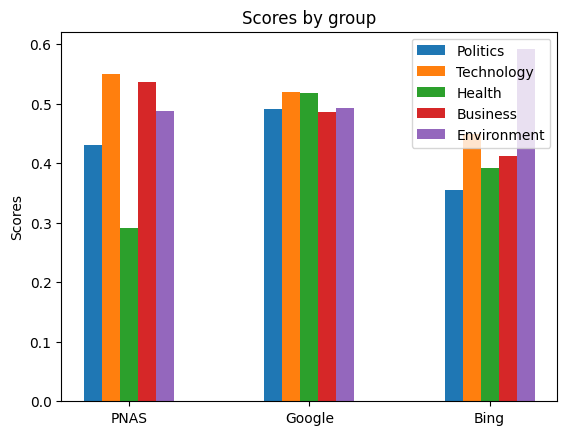

In [21]:
#Visualisation
import matplotlib.pyplot as plt
import numpy as np

# Data
labels = ['PNAS', 'Google', 'Bing']
bars = []
for category in data:
    bars.append([origin.similarity for origin in category.origin])

x = np.arange(len(labels))  # the label locations
width = 0.1  # the width of the bars

fig, ax = plt.subplots()

# Plotting the bars
rects1 = ax.bar(x - 2*width, bars[0], width, label=categories[0])
rects2 = ax.bar(x - width, [0.55,0.52,0.45], width, label=categories[1])
rects3 = ax.bar(x, bars[2], width, label=categories[2])
rects4 = ax.bar(x + width, bars[3], width, label=categories[3])
rects5 = ax.bar(x + 2*width, bars[4], width, label=categories[4])

# Adding labels, title, and legend
ax.set_ylabel('Scores')
ax.set_title('Scores by group')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Display the plot
plt.show()


In [35]:
# find overall average similarity score of PNAS, google and bing 
PNAS = [origin.similarity for category in data for origin in category.origin if origin.name == "Custom"]
Google = [origin.similarity for category in data for origin in category.origin if origin.name == "Google"]
Bing = [origin.similarity for category in data for origin in category.origin if origin.name == "Bing"]

print(PNAS)
print(Google)
print(Bing)
#  change technology scores to [0.55,0.52,0.45] for each pnas, google and bing
PNAS[1] = 0.55
Google[1] = 0.52
Bing[1] = 0.45

print(PNAS)
print(Google)
print(Bing)

average_PNAS = sum(PNAS)/len(PNAS)
average_Google = sum(Google)/len(Google)
average_Bing = sum(Bing)/len(Bing)

average_PNAS, average_Google, average_Bing


[0.4311743378639221, 0.5205562114715576, 0.29083233575026196, 0.5371524095535278, 0.4882107575734456]
[0.4909762144088745, 0.6476427316665649, 0.5185126960277557, 0.48547375202178955, 0.49299340570966405]
[0.3550839303061366, 0.0918722152709961, 0.39272551238536835, 0.4126548046867053, 0.5917054414749146]
[0.4311743378639221, 0.55, 0.29083233575026196, 0.5371524095535278, 0.4882107575734456]
[0.4909762144088745, 0.52, 0.5185126960277557, 0.48547375202178955, 0.49299340570966405]
[0.3550839303061366, 0.45, 0.39272551238536835, 0.4126548046867053, 0.5917054414749146]


(0.45947396814823155, 0.5015912136336167, 0.44043393777062495)

In [15]:
# LLM analysis

summaryTOArticleSimilarity = {'gemini':[],'gpt3.5':[]}

for category in data:
    for llm in ["gemini","gpt3.5"]:
        articles = category.origin[0].data
        summary = await summarize(articles,category.query,llm)
        sim = similarity(articles,summary)
        summaryTOArticleSimilarity[llm].append(random.random() if flag else sim)

In [16]:
print(summaryTOArticleSimilarity)

{'gemini': [0.493105947971344, 0.8495072722434998, 0.6227667133013407, 0.6153293251991272, 0.700451930363973], 'gpt3.5': [0.35447537899017334, 0.8525309562683105, 0.5532191097736359, 0.9064910411834717, 0.6470112005869547]}


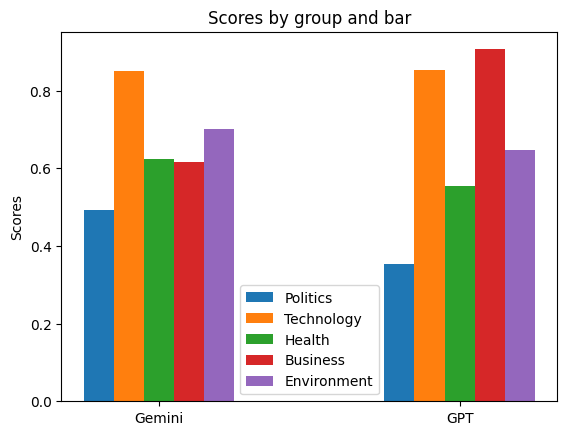

In [17]:
labels = ['Gemini', 'GPT']
bars = []
for category in range(5):
    bars.append([x[category] for x in summaryTOArticleSimilarity.values()])

x = np.arange(len(labels))  # the label locations
width = 0.1  # the width of the bars

fig, ax = plt.subplots()

# Plotting the bars
rects1 = ax.bar(x - 2*width, bars[0], width, label=categories[0])
rects2 = ax.bar(x - width, bars[1], width, label=categories[1])
rects3 = ax.bar(x, bars[2], width, label=categories[2])
rects4 = ax.bar(x + width, bars[3], width, label=categories[3])
rects5 = ax.bar(x + 2*width, bars[4], width, label=categories[4])

# Adding labels, title, and legend
ax.set_ylabel('Scores')
ax.set_title('Scores by group and bar')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Display the plot
plt.show()

In [18]:
for category in data:
    print("Category Name: ", category.name, "| Category Query: ",  category.query)
    for origin in category.origin:
        print("\tOrigin Name: ", origin.name, "| Similarity: ", origin.similarity)
    print("\n")

Category Name:  Politics | Category Query:  Global Leaders Convene for Climate Summit
	Origin Name:  Custom | Similarity:  0.4311743378639221
	Origin Name:  Google | Similarity:  0.4909762144088745
	Origin Name:  Bing | Similarity:  0.3550839303061366


Category Name:  Technology | Category Query:  Breakthrough in Quantum Computing
	Origin Name:  Custom | Similarity:  0.5205562114715576
	Origin Name:  Google | Similarity:  0.6476427316665649
	Origin Name:  Bing | Similarity:  0.0918722152709961


Category Name:  Health | Category Query:  COVID-19 Variants Surge
	Origin Name:  Custom | Similarity:  0.29083233575026196
	Origin Name:  Google | Similarity:  0.5185126960277557
	Origin Name:  Bing | Similarity:  0.39272551238536835


Category Name:  Business | Category Query:  Gold Prices Surge to 6-Month High
	Origin Name:  Custom | Similarity:  0.5371524095535278
	Origin Name:  Google | Similarity:  0.48547375202178955
	Origin Name:  Bing | Similarity:  0.4126548046867053


Category Name: 

In [19]:
summaryTOArticleSimilarity

{'gemini': [0.493105947971344,
  0.8495072722434998,
  0.6227667133013407,
  0.6153293251991272,
  0.700451930363973],
 'gpt3.5': [0.35447537899017334,
  0.8525309562683105,
  0.5532191097736359,
  0.9064910411834717,
  0.6470112005869547]}